# Explore Model Embeddings

In [1]:
from pathlib import Path
import os
import warnings

%load_ext autoreload
%autoreload 2

# ignore warnings for now ...
warnings.filterwarnings('ignore')

if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

!pwd

/Users/tommylees/github/ml_drought


In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

data_dir = Path('data/')
# data_dir = Path('/Volumes/Lees_Extend/data/zip_data')
data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data/')
plot_dir = Path('/Users/tommylees/Downloads')

assert data_dir.exists()

In [3]:
import seaborn as sns
from src.utils import drop_nans_and_flatten

from src.analysis import read_train_data, read_test_data, read_pred_data

In [4]:
EXPERIMENT =      'one_month_forecast_BOKU_VCI3M_adede_only_vars'
TRUE_EXPERIMENT = 'one_month_forecast_BOKU_VCI3M_our_vars_20205006_1550'
TARGET_VAR =      'VCI3M'

In [5]:
EXPERIMENT =      'one_month_forecast_BOKU_boku_VCI_our_vars'
TRUE_EXPERIMENT = 'one_month_forecast_BOKU_boku_VCI_our_vars'
TARGET_VAR =      'boku_VCI'

# Read in the data

In [6]:
X_train, y_train = read_train_data(data_dir, experiment=EXPERIMENT)
X_test, y_test = read_test_data(data_dir, experiment=EXPERIMENT)
static_ds = xr.open_dataset(data_dir / "features/static/data.nc")

ds = xr.merge([y_train, y_test]).sortby('time').sortby('lat')
d_ = xr.merge([X_train, X_test]).sortby('time').sortby('lat')
ds = xr.merge([ds, d_])

In [7]:
print("TRAINING DATA")
display(ds)
print('\n\n')
print("TARGET DATA")
display(y_test)

TRAINING DATA


<xarray.Dataset>
Dimensions:     (lat: 45, lon: 35, time: 205)
Coordinates:
  * time        (time) datetime64[ns] 2001-12-31 2002-01-31 ... 2018-12-31
  * lon         (lon) float64 33.75 34.0 34.25 34.5 ... 41.5 41.75 42.0 42.25
  * lat         (lat) float64 -5.0 -4.75 -4.5 -4.25 -4.0 ... 5.25 5.5 5.75 6.0
Data variables:
    boku_VCI    (time, lat, lon) float64 100.0 100.0 98.82 ... 11.94 78.34 40.51
    p84.162     (time, lat, lon) float64 1.45e-05 -5.456e-05 ... nan nan
    pev         (time, lat, lon) float64 -0.005993 -0.006077 ... nan nan
    sp          (time, lat, lon) float64 8.862e+04 8.927e+04 ... nan nan
    t2m         (time, lat, lon) float64 297.5 298.4 297.4 296.2 ... nan nan nan
    tp          (time, lat, lon) float64 0.003657 0.00285 0.004386 ... nan nan
    VCI         (time, lat, lon) float64 57.69 89.55 63.82 45.12 ... nan nan nan
    precip      (time, lat, lon) float64 102.0 107.6 122.3 111.1 ... nan nan nan
    E           (time, lat, lon) float64 85.9 60.61 60




TARGET DATA


<xarray.Dataset>
Dimensions:   (lat: 45, lon: 35, time: 36)
Coordinates:
  * lon       (lon) float64 33.75 34.0 34.25 34.5 ... 41.5 41.75 42.0 42.25
  * lat       (lat) float64 6.0 5.75 5.5 5.25 5.0 ... -4.0 -4.25 -4.5 -4.75 -5.0
  * time      (time) datetime64[ns] 2016-01-31 2016-02-29 ... 2018-12-31
Data variables:
    boku_VCI  (time, lat, lon) float64 64.45 52.16 97.37 96.48 ... nan nan nan

In [8]:
from src.utils import get_ds_mask
mask = get_ds_mask(X_train.VCI)

bline_pred = read_pred_data('previous_month', data_dir, experiment=EXPERIMENT)[-1].where(~mask)
lstm_pred = read_pred_data('rnn', data_dir, experiment=EXPERIMENT)[-1].where(~mask)
ealstm_pred = read_pred_data('ealstm', data_dir, experiment=EXPERIMENT)[-1].where(~mask)

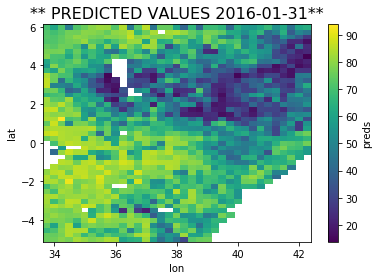

In [9]:
fig, ax = plt.subplots()
time_ix = 0
time = ealstm_pred.isel(time=time_ix).time.values
ealstm_pred.isel(time=time_ix).plot(ax=ax)
ax.set_title(f"** PREDICTED VALUES {str(time).split('T')[0]}**", size=16);

# Read in the models
Input data:
* boku_VCI    
* pev         
* t2m         
* precip      
* E           
* SMroot      
* SMsurf


\+ each variables SPATIAL MEAN (therefore 14 input variables)

In [10]:
from src.models import load_model

In [11]:
ealstm = load_model(data_dir / 'models' / EXPERIMENT / 'ealstm' / 'model.pt')
lstm = load_model(data_dir / 'models' / EXPERIMENT / 'rnn' / 'model.pt')

In [12]:
dir(ealstm)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_concatenate_data',
 '_convert_delta_to_raw_values',
 '_get_background',
 '_get_morris_explanations',
 '_get_shap_explanations',
 '_initialize_model',
 '_input_to_tuple',
 '_load_spatial_mask',
 '_make_analysis_folder',
 '_one_hot',
 'batch_size',
 'current_size',
 'data_path',
 'data_vars',
 'denormalize_y',
 'dense_features',
 'device',
 'evaluate',
 'experiment',
 'explain',
 'explainer',
 'features_per_month',
 'get_dataloader',
 'get_static_embedding',
 'hidden_size',
 'ignore_vars',
 'include_latlons',
 'include_monthly_aggs',
 'include_pred_month',
 'include_prev_y',
 'include_yearly_aggs',
 'input_dense',
 'load',
 'model',
 'model_dir',
 'model_name',
 'models_dir',
 'normalize_y',
 'normalizing_dict',
 'num_locations',
 'pred_months',
 'predict',
 'predict_delta',
 'rnn_dropout',
 'save_model',
 'spatial_mask',
 'static',
 'static_embedding_size',
 'static_size',
 'surrounding_pixels',
 'to',
 'train',
 'yearly_agg_size']

In [13]:
ealstm.models_dir = data_dir / 'models' / EXPERIMENT
lstm.models_dir = data_dir / 'models' / EXPERIMENT

ealstm.ignore_vars = [v for v in ealstm.ignore_vars if v not in ['VCI3M', 'modis_ndvi']]
lstm.ignore_vars =[v for v in lstm.ignore_vars if v not in ['VCI3M', 'modis_ndvi']]

ealstm.features_per_month  # x.shape[-1] = the number of features in dynamic data 

14

# Interpret Model

In [14]:
dir(ealstm.model.static_embedding)

['__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_tracing_name',
 '_version',
 'add_module',
 'apply',
 'bias',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'in_features',
 'load_state_dict',
 'modules',
 'named_buffers',
 'named_children',
 'named_modules',
 'named_parameters',
 'out_features',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'requires_grad_',
 'reset_parameters',
 'share_memory',
 'state_dict',
 'to',
 'train',
 'training',
 'type',
 'weight',
 'zero_grad']

In [15]:
od = ealstm.model.static_embedding.state_dict()
weight = od['weight'].numpy()
bias = od['bias'].numpy()

In [18]:
ealstm.ignore_vars =[v for v in ealstm.ignore_vars if v not in ['VCI3M', 'modis_ndvi']]
dl = ealstm.get_dataloader('train')
x = [x for x in dl]

/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1985_1 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1985_2 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1986_1 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1986_2 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1994_10 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1994_11 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1994_12 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1995_1 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1995_10 returns no values. Skippi

In [16]:
w,b = ealstm.get_static_embedding()
w.shape
# b.shape
# ealstm.static_embedding_size
# ealstm.static_size

(64, 24)

In [51]:
# BUILD the static input data (for each pixel)
pred_month_data = x[0][0][1]
latlons_data = x[0][0][2]
yearly_aggs_data = x[0][0][4]
static_data = x[0][0][5]
prev_y_data = x[0][0][6]

static_data.shape
yearly_aggs_data.shape

ea_static_size = 0

# calculate the static size
include_pred_month = True
ea_static_size = ea_static_size + 12 if include_pred_month else ea_static_size

latlons = True
ea_static_size = ea_static_size + 2 if latlons else ea_static_size

yearly_agg = True
yearly_agg_size = yearly_aggs_data.shape[-1]
ea_static_size = ea_static_size + yearly_agg_size if yearly_agg else ea_static_size

static = True
static_size = static_data.shape[-1]
ea_static_size = ea_static_size + static_size if static else ea_static_size

include_prev_y = True
ea_static_size = ea_static_size + 1 if include_prev_y else ea_static_size

print("No. of static features: ", ea_static_size)
# check w^Tx + b is a valid matrix operation
assert w.T.shape[0] == ea_static_size

# append the static_arrays
static_x = []
static_x.append(ealstm._one_hot(torch.from_numpy(pred_month_data), 12).numpy())
static_x.append(latlons_data)
static_x.append(yearly_aggs_data)
static_x.append(static_data)
static_x.append(prev_y_data)

static_x = np.concatenate(static_x, axis=-1)

print("Static X Data Shape: ", static_x.shape)
# check w^Tx + b is a valid matrix operation
assert w.T.shape[0] == static_x.shape[-1]

No. of static features:  24
Static X Data Shape:  (1402, 24)


In [88]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

w.shape

(64, 24)

In [179]:
# calculate the embedding
embedding = []
for pixel_ix in range(static_x.shape[0]):
    embedding.append(sigmoid(np.dot(w, static_x[pixel_ix]) + b))
    
embedding = np.array(embedding)

# Visualise the Static Embedding

Text(0, 0.5, 'Activation')

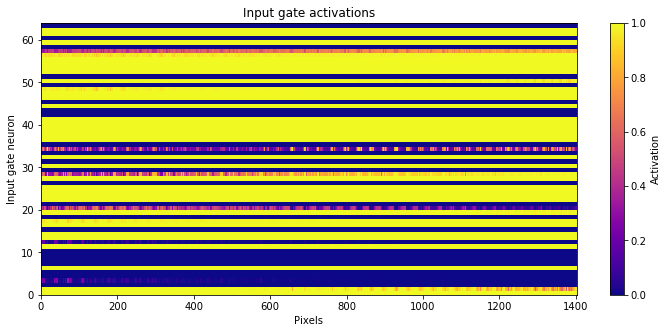

In [103]:
fig, ax = plt.subplots(figsize=(12,5))
img = ax.pcolor(embedding.T, cmap='plasma')
ax.set_xlabel("Pixels")
ax.set_ylabel("Input gate neuron")
ax.set_title("Input gate activations")
cbar = plt.colorbar(img, ax=ax)
cbar.ax.set_ylabel("Activation")

### which of these neurons actually vary?

In [156]:
threshold = 0.01

mask_same = np.all(np.isclose(a, a[0,:], threshold), axis=0)
print(f"How many neurons have the same values (thresh {threshold}): ".ljust(58), mask_same.sum())
print(f"How many neurons are left: ".ljust(58), len(mask_same) - mask_same.sum())
remove_constants = embedding[:, ~mask_same]

How many neurons have the same values (thresh 0.01):       40
How many neurons are left:                                 24


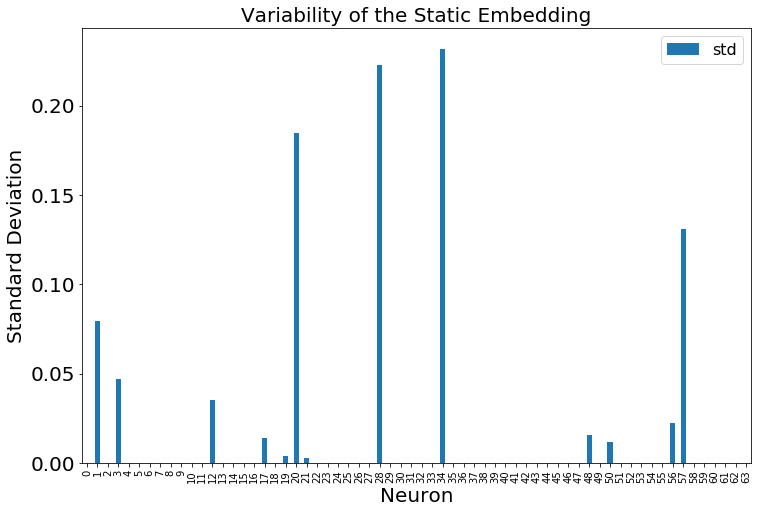

In [178]:
fig, ax = plt.subplots(figsize=(12, 8))
pd.DataFrame({'std': np.std(embedding, axis=0)}, index=np.arange(0, 64)).plot.bar(ax=ax)

plt.legend(fontsize=16)
ax.set_title('Variability of the Static Embedding')
ax.set_ylabel('Standard Deviation')
ax.set_xlabel('Neuron')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] # + ax.get_xticklabels()
              + ax.get_yticklabels()):
    item.set_fontsize(20)

### Remove the Non-Varying neurons

Text(0, 0.5, 'Activation')

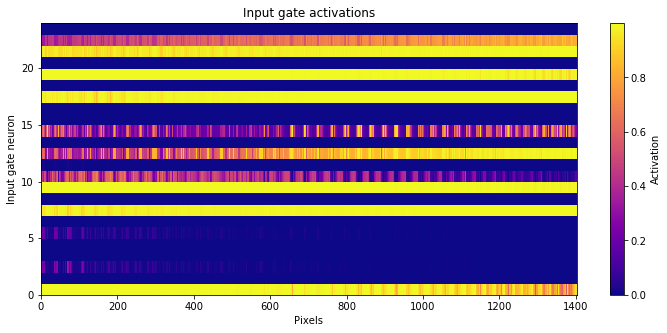

In [157]:
fig, ax = plt.subplots(figsize=(12,5))
img = ax.pcolor(remove_constants.T, cmap='plasma')
ax.set_xlabel("Pixels")
ax.set_ylabel("Input gate neuron")
ax.set_title("Input gate activations")
cbar = plt.colorbar(img, ax=ax)
cbar.ax.set_ylabel("Activation")

### Explore how these activations vary with inputs

In [187]:
from sklearn.cluster import KMeans

In [322]:
# Taken directly from Kratzert et al (2019) 
# https://github.com/kratzert/ealstm_regional_modeling/blob/master/papercode/clusterutils.py
from collections import defaultdict

ks = [4, 5]
clusters = {k: {} for k in ks}
for k in ks:
    clusterer = KMeans(n_clusters=k, random_state=0, init='k-means++',
                       n_init=200).fit(embedding)

    for pixel in range(embedding.shape[0]):
        emb = embedding[pixel, :]
        clusters[k][pixel] = clusterer.predict(emb.reshape(1, -1))[0]

In [210]:
np.array([v for v in clusters[5].values()]).shape

array([33.75, 34.  , 34.25, ..., 38.5 , 38.75, 39.  ], dtype=float32)

In [326]:
latitudes = latlons_data[:, 0]
longitudes = latlons_data[:, 1]
pixels = latlons

out = []
for k in ks:
    cluster = np.array([v for v in clusters[k].values()])
    coords = {'pixel': pixels}
    dims = ['pixel']
    cluster_ds = xr.Dataset({f'cluster_{k}': (dims, cluster), 'lat': (dims, latitudes), 'lon': (dims, longitudes),})
    out.append(cluster_ds)

cluster_ds = xr.auto_combine(out)
cluster_ds = cluster_ds.to_dataframe().set_index(['lat','lon']).to_xarray()

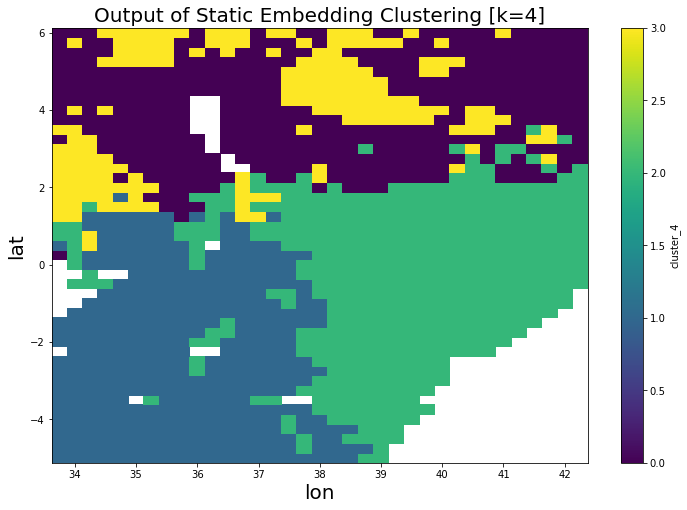

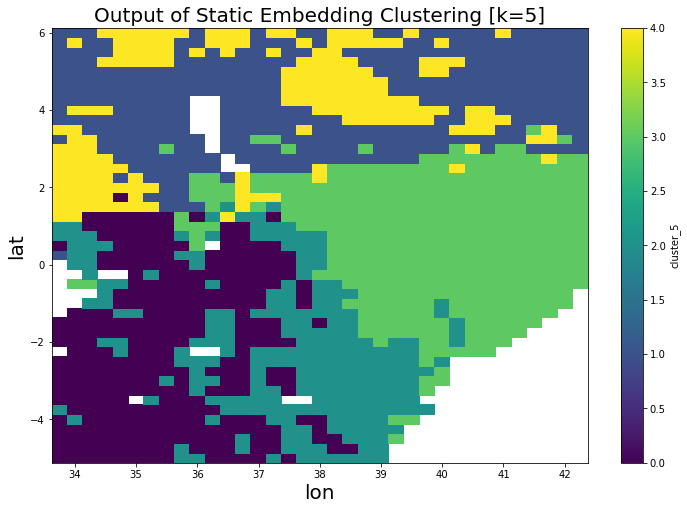

In [327]:
for k in ks:
    fig, ax = plt.subplots(figsize=(12,8))
    cluster_ds[f'cluster_{k}'].plot(ax=ax)
    ax.set_title(f'Output of Static Embedding Clustering [k={k}]');

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]): # + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

# Get Morris Gradients

In [55]:
?ealstm.get_dataloader

Signature:
ealstm.get_dataloader(
    mode: str,
    to_tensor: bool = False,
    shuffle_data: bool = False,
    **kwargs,
) -> src.models.data.DataLoader
Docstring: Return the correct dataloader for this model
File:      ~/github/ml_drought/src/models/base.py
Type:      method


In [107]:
ealstm.ignore_vars =[v for v in ealstm.ignore_vars if v not in ['VCI3M', 'modis_ndvi']]
dl = ealstm.get_dataloader('train')
x = [x for x in dl]

/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1985_1 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1985_2 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1986_1 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1986_2 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1994_10 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1994_11 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1994_12 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1995_1 returns no values. Skipping
/Volumes/Lees_Extend/data/ecmwf_sowc/data/features/one_month_forecast/train/1995_10 returns no values. Skippi

In [118]:
print(x[0][0][5][:10])
print(x[1][0][5][:10])

[[ 1.4883708  -0.74074964]
 [ 1.4883708  -0.70478326]
 [ 1.4883708  -0.64429435]
 [ 1.4883708   0.22707301]
 [ 1.4883708   0.06358946]
 [ 1.4883708   0.21562916]
 [ 1.4883708   0.65213026]
 [ 1.4883708   0.55567496]
 [ 1.4883708  -0.22741128]
 [ 1.4883708  -0.69660908]]
[[ 1.4883708  -0.74074964]
 [ 1.4883708  -0.70478326]
 [ 1.4883708  -0.64429435]
 [ 1.4883708   0.22707301]
 [ 1.4883708   0.06358946]
 [ 1.4883708   0.21562916]
 [ 1.4883708   0.65213026]
 [ 1.4883708   0.55567496]
 [ 1.4883708  -0.22741128]
 [ 1.4883708  -0.69660908]]


In [ ]:
test_arrays_loader = ealstm.get_dataloader(
                mode="train", batch_file_size=1, to_tensor=True
)
_, val = list(next(iter(test_arrays_loader)).items())[0]
var_names = val.var_names
x = val.x

In [65]:
?ealstm._get_morris_explanations

Signature: ealstm._get_morris_explanations(x: src.models.data.TrainData) -> Dict[str, numpy.ndarray]
Docstring:
https://github.com/kratzert/ealstm_regional_modeling/blob/master/papercode/morris.py

Will return a train data object with the Morris gradients of the inputs
File:      ~/github/ml_drought/src/models/neural_networks/base.py
Type:      method


In [67]:
ealstm.explain(method='morris')

TypeError: __init__() got an unexpected keyword argument 'shuffle'